In [9]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.metrics import *

In [10]:
df=pd.read_csv('kk.csv')

In [11]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [12]:
df.shape

(2200, 8)

In [13]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

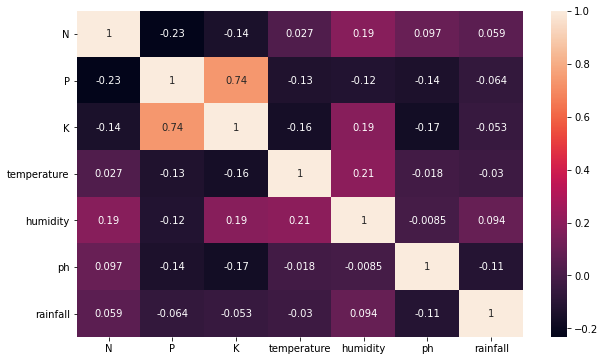

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

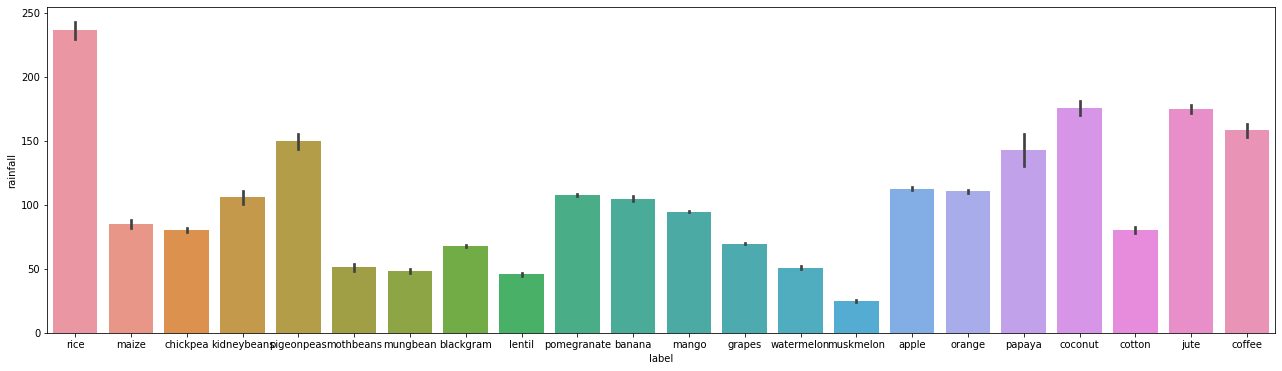

In [15]:
plt.figure(figsize=(22,6))
sns.barplot(x='label',y='rainfall', data=df)

In [16]:
cols=[]
for i in range(df.shape[0]):  
  cols.append(df.sort_values('rainfall',ascending=False)['label'][i])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [18]:
df['label'].value_counts()

rice           100
pigeonpeas     100
pomegranate    100
banana         100
grapes         100
apple          100
mango          100
coffee         100
orange         100
lentil         100
coconut        100
papaya         100
kidneybeans    100
mothbeans      100
chickpea       100
cotton         100
muskmelon      100
jute           100
maize          100
watermelon     100
blackgram      100
mungbean       100
Name: label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


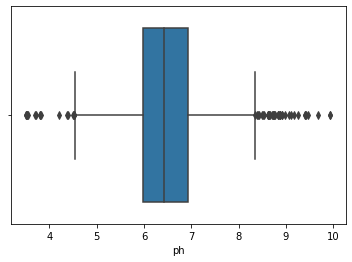

In [19]:
sns.boxplot(df['ph'])

In [20]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [21]:
X=df.drop('label',axis=1)
y=df.label

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_vaid=train_test_split(X,y,test_size=0.2,random_state=0)

In [23]:
pp=Pipeline([
             ('model',RandomForestClassifier())
])

In [24]:
y_pred=pp.fit(x_train,y_train).predict(x_valid)

In [25]:
print(classification_report(y_vaid,y_pred))
print(accuracy_score(y_vaid,y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.95      1.00      0.98        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [26]:
from google.colab import files
from joblib import *
dump(pp,'crop.ml')
files.download('crop.ml')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
from joblib import *

In [28]:
model=load('crop.ml')

In [29]:
model.predict([[34,33,44,22,82,7,204]])[0]

'pomegranate'